A1 a) knn, leave one out and leave one out error (ssd)

In [91]:
import numpy as np
def k_nn (X, direction):
    labels = []
    distances = np.sqrt(np.sum((X[:, np.newaxis, :] - X)**2, axis=-1))
    '''
    dists = []
    for row in x_test:
        d = np.sqrt(np.sum((row - x_train)**2, axis=-1))
        dists.append(d)
    distances = np.array(dists)
    '''
    
    for dist in distances:
        #changes all the 0's (observations distance to itself) to infinite so that it cant be picked
        #while keeping the index order the same
        
        dist = np.where(dist == 0, np.inf, dist)
        min_index = np.argmin(dist)
        labels.append(direction[min_index])
        
    return labels

In [92]:
def ssd (pred, test):
    
    sum_of_squared_diff = np.sum((pred-test)**2)/test.shape[0]
    # returns the sums between all predicted faces over the true angles
    return sum_of_squared_diff

In [94]:
import numpy as np

# Read the contents of the file into a np array
data = np.loadtxt("noisy_sculpt_faces.txt")

data.shape


(100, 259)

In [95]:
from sklearn.model_selection import train_test_split

X = data[:,:256]

angles = data[:,256:]


print(angles.shape,X.shape)

(100, 3) (100, 256)


In [96]:
# prediction as a list of angles
pred = k_nn(X, angles)
print(pred[0], angles[0])

# sum the squared error over all the faces
ssd(pred, angles)

[ 53.826258   -2.4527189 154.38092  ] [ 44.193998    9.8366946 227.9364   ]


5071.296239644929

A1 b) forward selection

In [97]:
def feature_selection(X,angles):
    all_SSD = []
    filter_indices = []
    current_model = float('inf')


    is_better = True
    while is_better:
        best_index = 0
        current_ssd = float('inf')
        is_better = False
        for i in range(X.shape[1]):
            if i not in filter_indices:

                if not filter_indices:
                    new_indices = [i]
                else:
                    new_indices = np.concatenate((filter_indices, [i]))

                new_X = X[:,new_indices]
                # Now the data has been filtered with the chosen indices (selected features) and 
                # a new index across all indexes in the data
                new_ssd = ssd(k_nn(new_X, angles), angles)

                if new_ssd < current_ssd:
                    current_ssd = new_ssd
                    best_index = i

        # Adds the best index to the filter index list            
        filter_indices.append(best_index)           
        # If the new selected features propose a better model than current, the loop will stay on
        new_model = ssd(k_nn(new_X, angles), angles)

        
        if new_model < current_model:
            
            all_SSD.append(new_model)
            current_model = new_model
            is_better = True

    return all_SSD


A1 c) add best feature in each iteration until the end

In [98]:
 def feature_selection_variant(X,angles):
    all_SSD = []
    filter_indices = []
    current_model = float('inf')

    for j in range(X.shape[1]):    
        best_index = 0
        current_ssd = float('inf')
        for i in range(X.shape[1]):
            if i not in filter_indices:

                if not filter_indices:
                    new_indices = [i]
                else:
                    new_indices = np.concatenate((filter_indices, [i]))

                new_X = X[:,new_indices]

                # Now the data has been filtered with the chosen indices (selected features) 
                # and a new index across all indexes in the data
                new_ssd = ssd(k_nn(new_X, angles), angles)

                if new_ssd < current_ssd:
                    current_ssd = new_ssd
                    best_index = i

        # Adds the best index to the filter index list            
        filter_indices.append(best_index)           

        new_model = ssd(k_nn(new_X, angles), angles)

        all_SSD.append(new_model)

    return all_SSD, filter_indices

Text(0.5, 0, 'Total features')

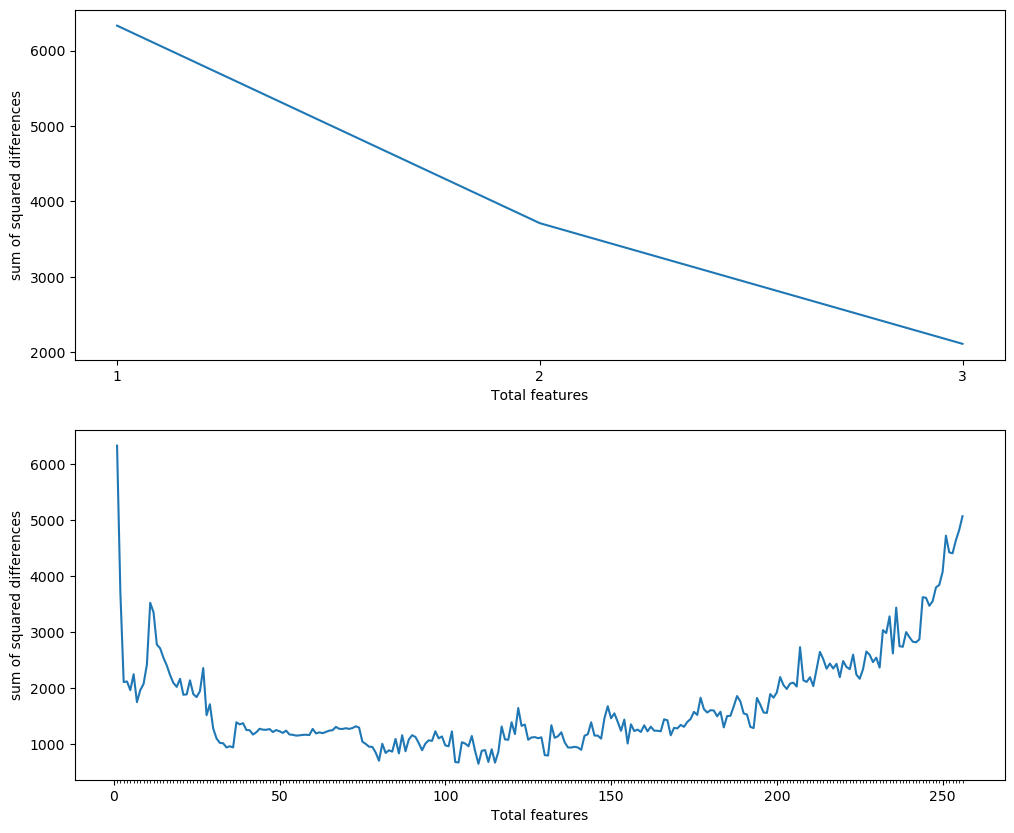

In [99]:
import matplotlib.pyplot as plt
SSD = feature_selection(X, angles)


fig, (ax1, ax2) = plt.subplots(2,1, figsize=(12,10))
x = np.arange(1, len(SSD) + 1, 1)
ax1.plot(x,SSD)
ax1.set_xticks(range(1,len(SSD)+1))
ax1.set_ylabel("sum of squared differences")
ax1.set_xlabel("Total features")


SSD_var, indices = feature_selection_variant(X, angles)
x2 = np.arange(1, len(SSD_var) + 1, 1)
ax2.plot(x2,SSD_var)
ax2.set_xticks(range(1,len(SSD_var)+1),10)
ax2.set_ylabel("sum of squared differences")
ax2.set_xlabel("Total features")


1A d) 

The later algorithm gets better results quite early in the iterations due to there being a small change in the beginning. At 4th feature sum of squared differences score rises which stops the first algorithm, and it gets better right after this point at 5th feature. We can see from graph 2 that 2nd algorithm gets quite stable good results untill 150 features and then starts getting worse again.

2A Variable ranking

1.

Pearsons correlation could be used as a simple ranking method in feature selection by showing what features may have correlation to the target variables. The features with high values could be chosen as the variables to be used in a model. However in this case, the correlation would assume that the variables are independent of each other, which might cause problems. Correlation can also only detect linear dependencies between vaariable and the target.

2.

In [103]:
def variable_ranking(X,angles):
    import operator
    
    all_ssd = {}
    
    for i in range(X.shape[1]):
        
        indences = [i]
        new_X = X[:,indences]
      
        preds = k_nn(new_X, angles)
        # predictions versus the true angles
        new_ssd = ssd(preds, angles)
        
        # adds a pair, index of the variable and the squared error sum to a list
        all_ssd[i]=new_ssd
    # sorts the list so that the index of the variable can be looked at
    sorted_ssd = sorted(all_ssd.items(), key=operator.itemgetter(1))
    return sorted_ssd

In [104]:
ranking = variable_ranking(X,angles)

for i in range(len(indices)):
    print(indices[i], ranking[i][0])


189 189
53 24
137 32
224 59
32 18
24 53
147 49
102 206
13 228
192 197
229 219
138 218
84 224
207 229
206 226
107 245
200 34
180 174
26 205
167 35
116 236
245 115
8 17
132 56
205 244
105 214
80 180
54 33
135 168
125 55
120 25
250 54
174 146
12 190
218 200
46 94
153 176
113 87
56 20
9 203
124 152
208 70
194 52
59 149
228 45
104 215
98 4
89 39
165 220
17 191
166 91
73 238
96 210
18 255
246 19
253 3
142 37
114 157
146 40
81 207
190 234
197 129
214 44
122 221
112 38
71 230
182 127
222 81
101 167
62 184
99 47
184 99
170 95
219 140
179 58
128 150
37 204
57 222
226 82
162 102
87 77
171 198
70 211
188 63
244 208
198 147
49 138
215 42
35 195
15 179
0 113
52 6
151 173
2 110
6 22
100 171
201 86
199 21
181 199
115 0
133 48
33 2
220 247
251 182
159 194
238 62
230 90
187 118
126 76
106 134
169 43
148 84
68 239
240 235
67 160
58 162
79 61
51 104
93 178
38 26
212 46
97 145
185 50
39 65
186 78
252 117
48 172
191 105
110 73
41 242
195 169
1 23
140 51
233 74
78 241
210 231
241 141
172 9
145 131
163 96
111

Basically the first number is the same, but after that, the list is completely different